## Set-up

In [16]:
import pandas as pd
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [44]:
def plot_components(H, ax, figsize=(10,6), title='Components found by the NMF'):
    plt.figure(figsize=figsize)
    n_components = H.shape[0]
    for k in range(n_components):
        plt.plot(H[k,:], marker='o', linestyle='-', label=f'Component {k+1}')
    plt.xlabel('Hour')
    plt.ylabel('Load (MW)')
    plt.title(title)
    plt.legend()

In [46]:
def plot_components(H, ax=None, figsize=(10, 6), title='Components found by the NMF'):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()

    n_components = H.shape[0]
    for k in range(n_components):
        ax.plot(H[k, :], marker='o', linestyle='-', label=f'Component {k + 1}')

    ax.set_xlabel('Hour')
    ax.set_ylabel('Load (MW)')
    ax.set_title(title)
    ax.legend()

    return fig, ax

# NMF

In [6]:
input_df = pd.read_csv('data/daily_curves.csv', index_col=0)
input_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Calabria_2021-01-02_Saturday,552.943,514.861,462.221,448.924,457.576,462.207,492.594,526.408,579.682,648.228,...,660.975,648.877,658.723,745.817,773.431,828.180,831.509,758.732,669.630,596.548
Calabria_2021-01-03_Holiday,518.853,457.879,432.200,419.060,393.992,438.706,462.433,488.501,532.412,641.866,...,738.739,678.540,666.579,730.333,764.207,819.056,825.176,754.773,706.062,629.708
Calabria_2021-01-04_Working day,540.431,450.024,434.019,432.949,435.210,457.071,516.980,625.155,691.067,885.798,...,780.816,845.339,798.132,870.231,891.262,980.735,926.445,845.014,756.975,688.183


In [133]:
X = input_df.copy()

unit_info = input_df.index.str.extract(r'^(?P<region>[\w.]+)_(?P<year>\d{4})-(?P<month>\d{2})-\d{2}_(?P<daytype>[\w ]+)$').set_index(input_df.index)
df = pd.concat([input_df, unit_info], axis=1)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,region,year,month,daytype
Calabria_2021-01-02_Saturday,552.943,514.861,462.221,448.924,457.576,462.207,492.594,526.408,579.682,648.228,...,773.431,828.180,831.509,758.732,669.630,596.548,Calabria,2021,01,Saturday
Calabria_2021-01-03_Holiday,518.853,457.879,432.200,419.060,393.992,438.706,462.433,488.501,532.412,641.866,...,764.207,819.056,825.176,754.773,706.062,629.708,Calabria,2021,01,Holiday
Calabria_2021-01-04_Working day,540.431,450.024,434.019,432.949,435.210,457.071,516.980,625.155,691.067,885.798,...,891.262,980.735,926.445,845.014,756.975,688.183,Calabria,2021,01,Working day


In [135]:
X = input_df[(df.month=='10')&(df.daytype=='Working day')]
X = X.div(X.max(axis=1), axis=0)
X

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Calabria_2021-10-01_Working day,0.667030,0.485495,0.464637,0.444469,0.446117,0.458311,0.572280,0.670194,0.764895,0.845619,...,0.684819,0.653716,0.693456,0.737597,0.759425,0.981985,1.000000,0.865498,0.737024,0.691849
Calabria_2021-10-04_Working day,0.609639,0.555403,0.546793,0.545437,0.535772,0.552952,0.689527,0.753759,0.874751,0.837623,...,0.791353,0.833575,0.825935,0.838805,0.845691,1.000000,0.970673,0.878370,0.785775,0.708649
Calabria_2021-10-05_Working day,0.645767,0.503508,0.485322,0.473841,0.487185,0.522655,0.671509,0.721450,0.778735,0.831985,...,0.909016,0.939570,0.846828,0.846454,0.842442,1.000000,0.951793,0.870680,0.769889,0.675221
Calabria_2021-10-06_Working day,0.612366,0.504226,0.490388,0.502106,0.517042,0.528958,0.590364,0.668683,0.757114,0.773178,...,0.740980,0.836565,0.890765,0.924727,0.893262,0.981790,1.000000,0.899214,0.816351,0.752939
Calabria_2021-10-07_Working day,0.634093,0.572468,0.528786,0.546541,0.540380,0.584919,0.704118,0.774763,0.839538,0.890000,...,0.948379,0.954332,0.902300,0.910152,0.862003,0.982852,1.000000,0.909650,0.811706,0.715832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South_2022-10-25_Working day,0.653445,0.620386,0.588007,0.524589,0.524990,0.561122,0.662205,0.791950,0.850393,0.889257,...,0.861599,0.864254,0.842934,0.811095,0.859848,0.962252,1.000000,0.958678,0.874012,0.818535
South_2022-10-26_Working day,0.694904,0.601564,0.556546,0.562718,0.560721,0.584502,0.633500,0.738653,0.787800,0.805789,...,0.806085,0.822776,0.850163,0.830443,0.905155,1.000000,0.996499,0.964825,0.882320,0.817700
South_2022-10-27_Working day,0.784449,0.698742,0.656228,0.652422,0.665242,0.685894,0.769417,0.874188,0.881139,0.901172,...,0.879585,0.892289,0.893100,0.871055,0.914818,1.000000,0.985095,0.963785,0.890963,0.830621
South_2022-10-28_Working day,0.764819,0.706352,0.672627,0.659839,0.662355,0.682697,0.746794,0.814775,0.874365,0.928430,...,0.924125,0.925391,0.864095,0.846919,0.902695,0.984944,0.961318,0.901524,0.839834,0.802313


2295 iterations for cd
0.00016263560293886233 error for cd

1380 iterations for mu
0.0001695209877529428 error for mu


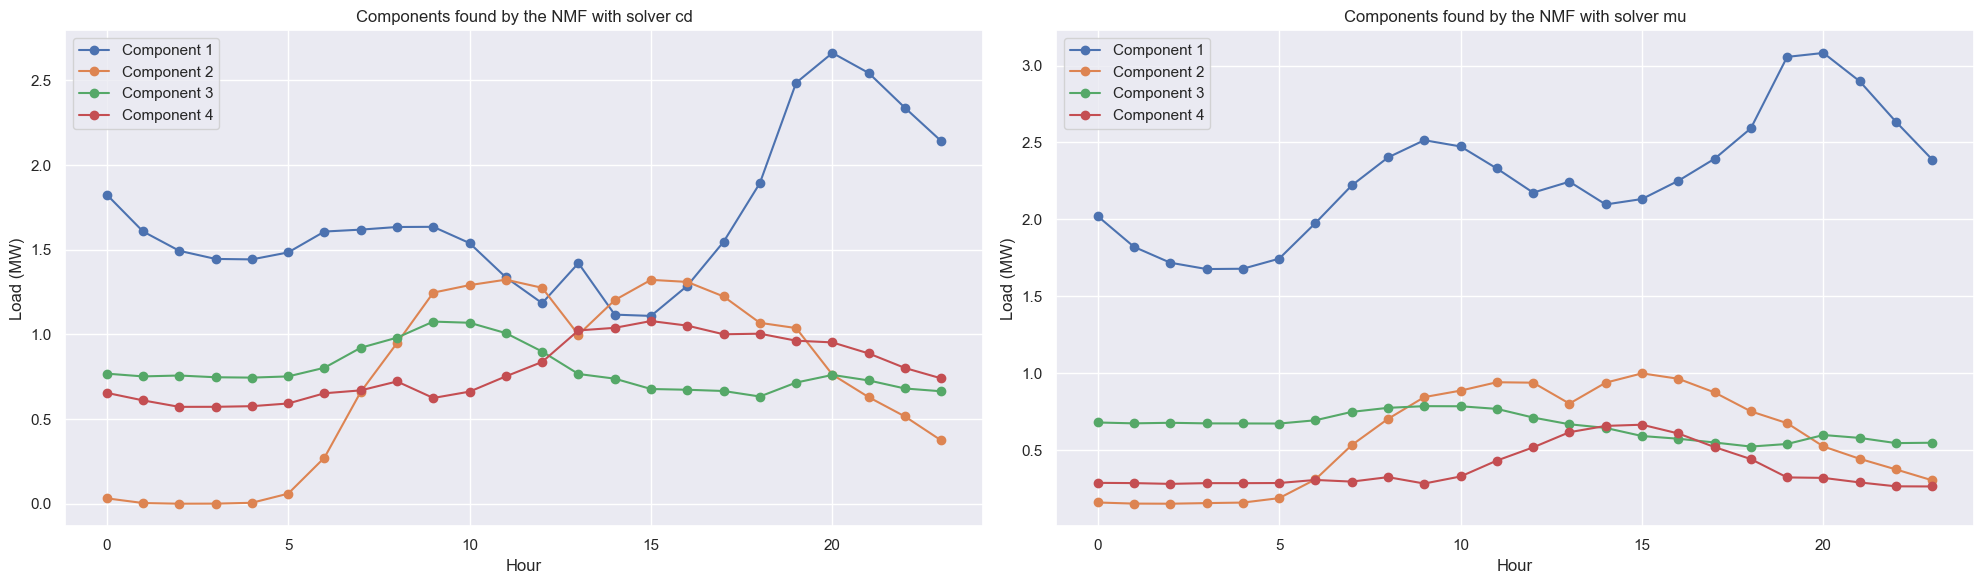

In [161]:
n_components = 4
random_state = None
tol = 1e-5
init = 'nndsvda'
max_iter = 4000
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

solver = 'cd'
model = NMF(n_components=n_components, random_state=random_state, solver=solver, tol=tol, init=init, max_iter=max_iter)
W = model.fit_transform(X)
H = model.components_
print('{} iterations for {}'.format(model.n_iter_, solver))
print('{} error for {}\n'.format(model.reconstruction_err_/X.size, solver))
plot_components(H, ax=axs[0], title=f"Components found by the NMF with solver {solver}")

solver = 'mu'
model = NMF(n_components=n_components, random_state=random_state, solver=solver, tol=tol, init=init, max_iter=max_iter)
W = model.fit_transform(X)
H = model.components_
print('{} iterations for {}'.format(model.n_iter_, solver))
print('{} error for {}'.format(model.reconstruction_err_/X.size, solver))
plot_components(H, ax=axs[1], title=f"Components found by the NMF with solver {solver}")

plt.tight_layout()

/Users/guillaume/bss/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/guillaume/bss/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


200
200


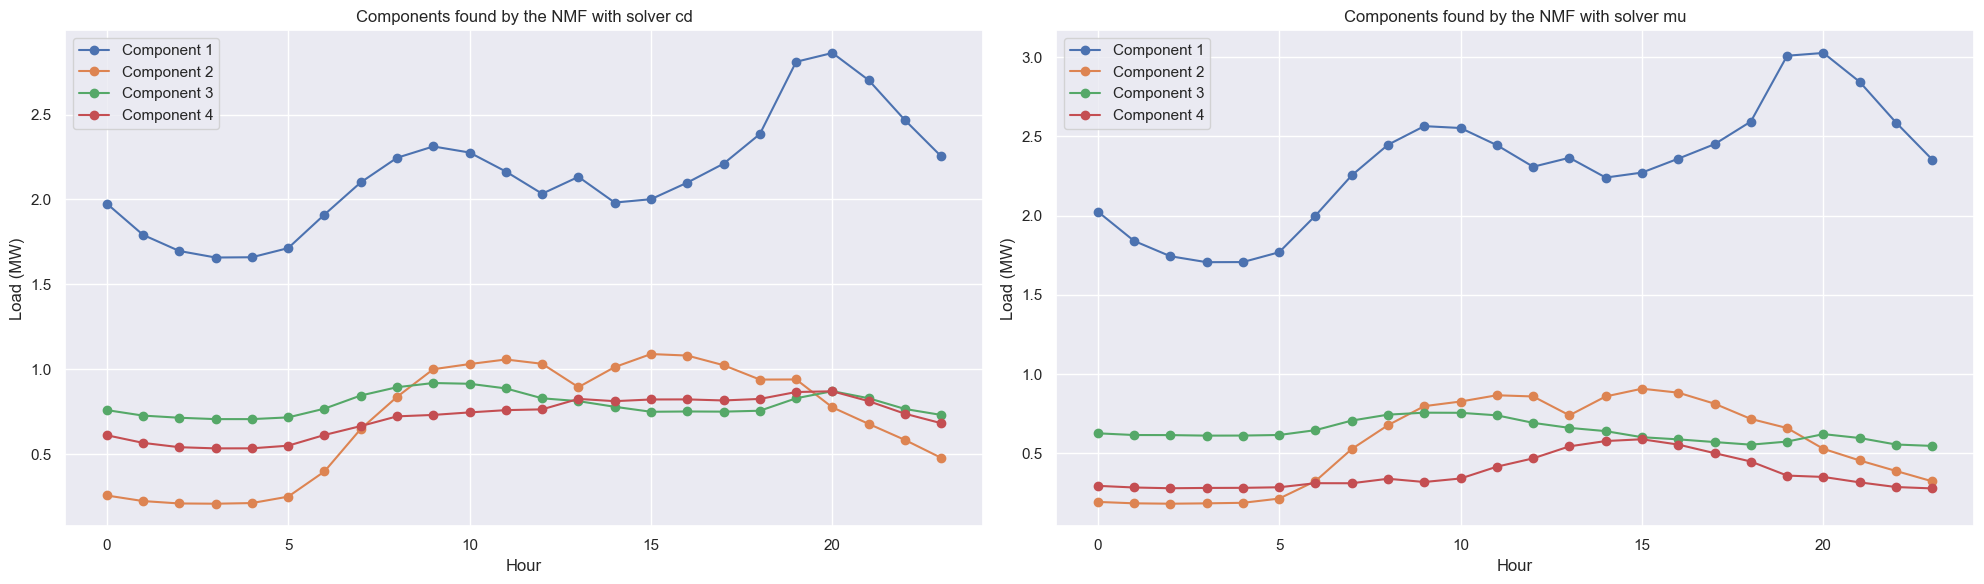

In [154]:
n_components = 4
random_state = None
tol = 1e-4
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

solver = 'cd'
model = NMF(n_components=n_components, random_state=random_state, solver=solver, tol=tol)
W = model.fit_transform(X)
H = model.components_
print(model.n_iter_)
plot_components(H, ax=axs[0], title=f"Components found by the NMF with solver {solver}")

solver = 'mu'
model = NMF(n_components=n_components, random_state=random_state, solver=solver, tol=tol)
W = model.fit_transform(X)
H = model.components_
print(model.n_iter_)
plot_components(H, ax=axs[1], title=f"Components found by the NMF with solver {solver}")

plt.tight_layout()

# Tests

In [80]:
unit_info = X.index.str.extract(r'^(?P<region>[\w.]+)_(?P<year>\d{4})-(?P<month>\d{2})-\d{2}_(?P<daytype>[\w ]+)$').set_index(X.index)
df = pd.concat([X, unit_info], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,region,year,month,daytype
Calabria_2021-01-02_Saturday,552.943,514.861,462.221,448.924,457.576,462.207,492.594,526.408,579.682,648.228,...,773.431,828.180,831.509,758.732,669.630,596.548,Calabria,2021,01,Saturday
Calabria_2021-01-03_Holiday,518.853,457.879,432.200,419.060,393.992,438.706,462.433,488.501,532.412,641.866,...,764.207,819.056,825.176,754.773,706.062,629.708,Calabria,2021,01,Holiday
Calabria_2021-01-04_Working day,540.431,450.024,434.019,432.949,435.210,457.071,516.980,625.155,691.067,885.798,...,891.262,980.735,926.445,845.014,756.975,688.183,Calabria,2021,01,Working day
Calabria_2021-01-05_Working day,601.762,548.971,516.841,511.542,497.733,518.294,582.056,675.144,745.112,926.874,...,885.152,888.862,866.911,797.831,689.408,613.111,Calabria,2021,01,Working day
Calabria_2021-01-06_Holiday,522.253,460.861,442.133,442.172,434.206,446.617,465.662,510.365,557.035,719.846,...,797.872,813.154,792.839,753.642,690.855,625.452,Calabria,2021,01,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South_2022-12-27_Working day,1308.316,1196.696,1118.799,1120.978,1261.263,1301.362,1596.961,1820.374,2114.503,2419.050,...,2609.307,2646.229,2607.138,2485.261,2204.701,1928.912,South,2022,12,Working day
South_2022-12-28_Working day,1414.026,1224.167,1015.749,955.943,936.003,1024.786,1263.846,1629.519,2071.388,2444.281,...,3033.573,3064.172,3021.570,2853.291,2550.622,2062.207,South,2022,12,Working day
South_2022-12-29_Working day,1825.454,1392.857,1556.300,1471.466,1446.057,1525.885,1747.927,1865.976,2035.924,2345.770,...,2425.699,2538.385,2462.135,2344.187,2048.957,1735.955,South,2022,12,Working day
South_2022-12-30_Working day,1528.905,1225.758,1115.273,1035.417,1050.114,1129.062,1317.993,1661.784,1885.976,2393.216,...,2543.212,2623.629,2664.239,2492.585,2206.210,2122.022,South,2022,12,Working day
